# Qno.1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

In [2]:
df = 3

In [3]:
sample_1 = [np.mean(chi2.rvs(df, 1)) for _ in range(1000)]
sample_5 = [np.mean(chi2.rvs(df, 5)) for _ in range(1000)]
sample_10 = [np.mean(chi2.rvs(df, 10)) for _ in range(1000)]

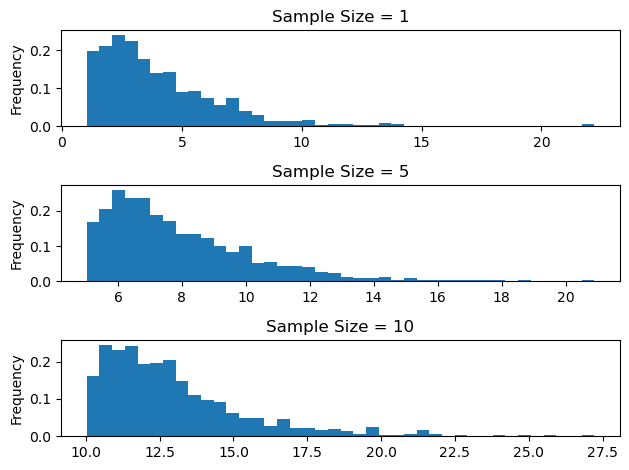

In [4]:
fig, axis = plt.subplots(3)
axis[0].hist(sample_1, bins=40, density=True)
axis[1].hist(sample_5, bins=40, density=True)
axis[2].hist(sample_10, bins=40, density=True)

axis[0].set_title('Sample Size = 1')
axis[0].set(ylabel='Frequency')
axis[1].set_title('Sample Size = 5')
axis[1].set(ylabel='Frequency')
axis[2].set_title('Sample Size = 10')
axis[2].set(ylabel='Frequency')
plt.tight_layout()

# Show the plot
plt.show()

# Qno.2

In [5]:
import csv
import numpy as np
from scipy.stats import spearmanr, pearsonr, kendalltau

In [6]:
def obtain_lum_data(filename):
    a = np.array([])
    with open(filename,mode='r',encoding='utf-8-sig') as lum:
        data = csv.reader(lum, delimiter=' ')
        next(data)    #this is to skip the header
        for row in data:
            a=np.append(a,float(row[0]))
        return a

In [7]:
def obtain_redshift_data(filename):
    b = np.array([])
    with open(filename,mode='r',encoding='utf-8-sig') as lum:
        data = csv.reader(lum, delimiter=' ')
        next(data)    #this is to skip the header
        for row in data:
            b=np.append(b,float(row[1]))
        return b

In [8]:
lum_list  = obtain_lum_data('qn2.csv')
redshift_list = obtain_redshift_data('qn2.csv')

In [9]:
rho_spearman, pval_spearman = spearmanr(redshift_list, lum_list)
rho_pearson, pval_pearson = pearsonr(redshift_list, lum_list)
rho_kendall, pval_kendall = kendalltau(redshift_list, lum_list)

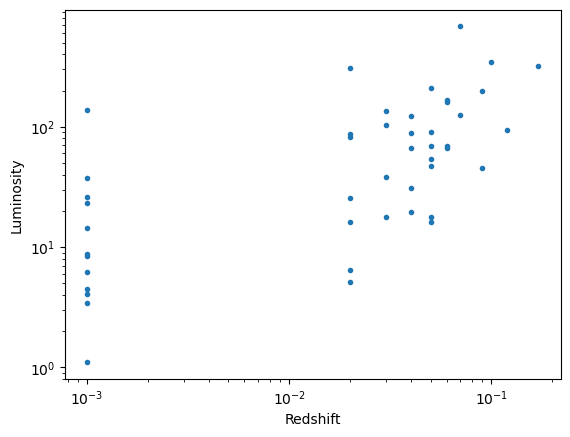

Spearman correlation coefficient:  0.6596325957535454
Spearman correlation p-value:  6.166489759081011e-07
Pearson correlation coefficient:  0.5144497852670243
Pearson correlation p-value:  0.00025464716576124137
Kendall-tau correlation coefficient:  0.5029584682704178


In [10]:
plt.loglog(redshift_list, lum_list, '.')
plt.xlabel("Redshift")
plt.ylabel("Luminosity")
plt.show()

print("Spearman correlation coefficient: ", rho_spearman)
print("Spearman correlation p-value: ", pval_spearman)
print("Pearson correlation coefficient: ", rho_pearson)
print("Pearson correlation p-value: ", pval_pearson)
print("Kendall-tau correlation coefficient: ", rho_kendall)

# Qno.3

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = np.array([0 ,2.75 ,7.80 ,11.64 ,13.79 ,14.20 ,13.15 ,11.14 ,8.72 ,6.34 ,
                 4.30 ,2.73 ,1.62 ,0.91 ,0.48 ,0.24 ,0.11 ,0.05 ,0.02 ,0.01 ,0.00])

In [13]:
weibull_values = np.array([])

lambda_ = 6.00
k = 2.00

for i in range(21):
    weibull = 100*(k/lambda_)*((i/lambda_)**(k -1))*np.exp(-1*(i/lambda_)**k)
    weibull_values = np.append(weibull_values, weibull)

<function matplotlib.pyplot.show(close=None, block=None)>

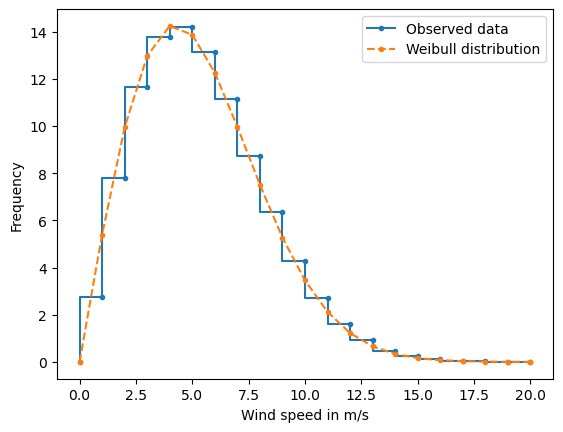

In [14]:
plt.step(np.arange(21), data, marker=".")
plt.plot(np.arange(21), weibull_values, marker=".", linestyle='--')
plt.legend(["Observed data", "Weibull distribution"])
plt.xlabel('Wind speed in m/s')
plt.ylabel('Frequency')
plt.show

# Qno.4

In [15]:
import numpy as np
from scipy.stats import norm, t, pearsonr

In [16]:
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)

In [17]:
pear_coeff, pear_p = pearsonr(x, y)

In [18]:
student_t = np.abs(pear_coeff * np.sqrt((1000-2) / (1 - pear_coeff**2)))
student_p = 2 * (1 - t.cdf(student_t, 1000-2))

In [19]:
print("Pearson correlation coefficient: ", pear_coeff)
print("Pearson correlation p-value: ", pear_p)
print("p-value calculated using Student-t distribution: ", student_p)

Pearson correlation coefficient:  0.023810737437563637
Pearson correlation p-value:  0.4519749780267724
p-value calculated using Student-t distribution:  0.45197497802679587


As the p-value calculated using pearson correlation and student-t distribution
are almost equal in value, we can conclude that the p-value calculated using 
pearson correlation agrees with that calculated using student-t distribution.